<h3>An introduction to Seaborn</h3>

In [1]:
# From seaborn.pydata - An introduction to a seaborn
# Seaborn works best with Pandas DataFrames and arrays that contains a whole data set.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

sns.set() # aesthetic parameters in one step(default seaborn theme)

In [4]:
tips = sns.load_dataset('tips') #an example dataset from seaborn library (https://github.com/mwaskom/seaborn-data)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Seaborn enables example data for exercising 
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

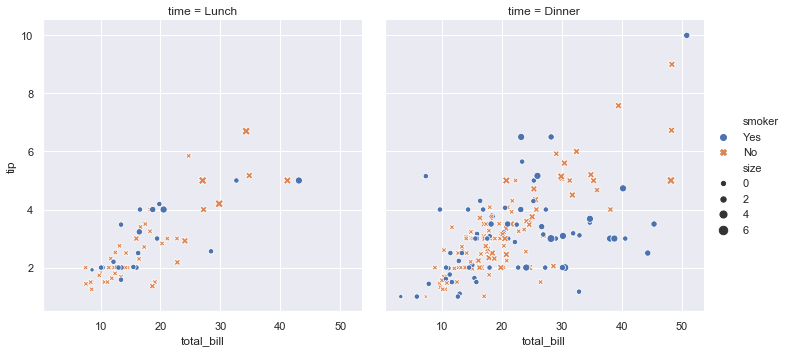

In [12]:
# no need to use dedicated for every variable parameters of visualisation
# seaborn makes it automatically, 'relplot' stands for stat relationships
# between different variables
sns.relplot(x='total_bill', y='tip', col='time',
           hue='smoker', style='smoker', size='size', data=tips);

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


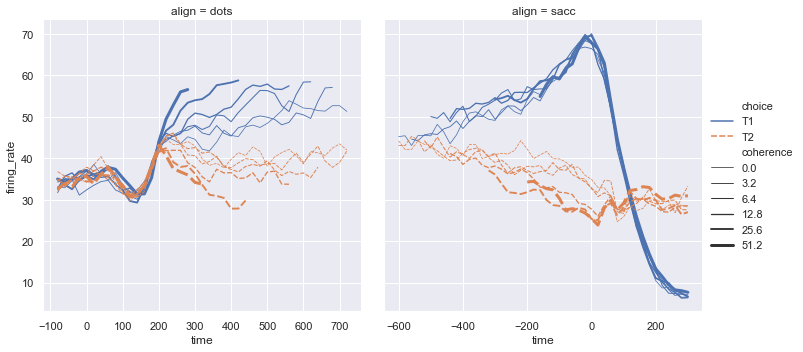

In [7]:
# another example which is visualized by line (not scatter)
dots = sns.load_dataset('dots')
dots.head()
sns.relplot(x='time', y='firing_rate', col='align',
           hue='choice', size='coherence', style='choice',
           facet_kws=dict(sharex=False), kind='line',
           legend='full', data=dots)

In [8]:
# statistical estimation(like mean for example) and error bars
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


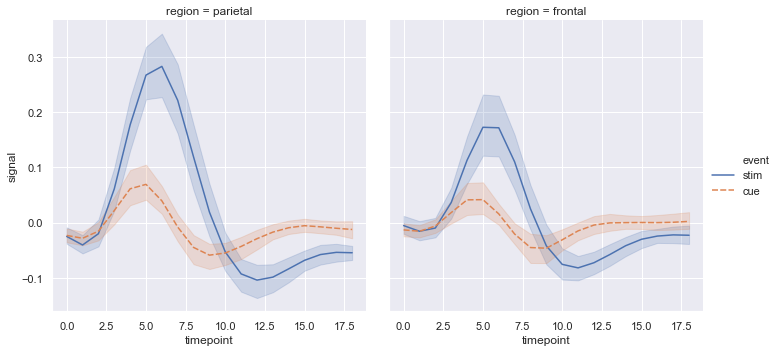

In [9]:
# bootstrapping used to compute confidence intervals
sns.relplot(x='timepoint',y='signal',col='region',hue='event',
            style='event',kind='line',data=fmri);

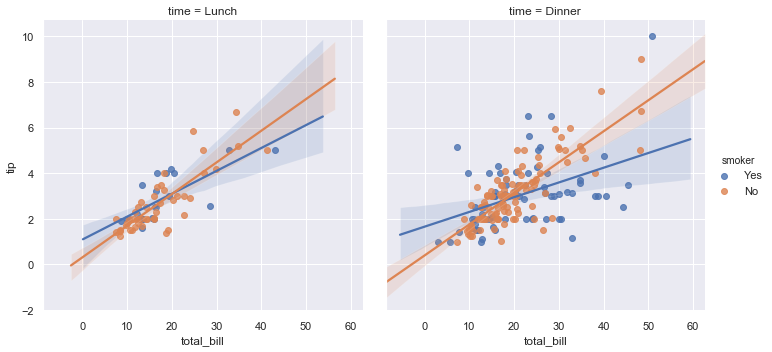

In [10]:
# enhancing a scatterplot to include a linear regression model
# and its uncertainty with the use of lmplot() function
sns.lmplot(x='total_bill', y='tip', col='time',
           hue='smoker', data=tips)

<h4>Specialized categorical plots</h4>

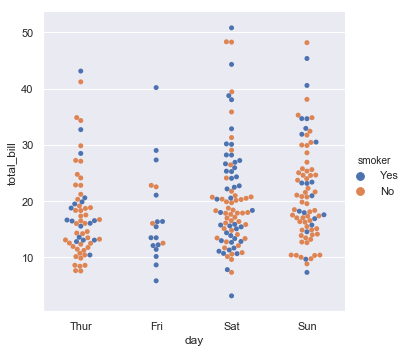

In [13]:
# catplot() for relations between one numeric and one or
# more categorical variables
sns.catplot(x='day', y='total_bill', hue='smoker',
           kind='swarm', data=tips);

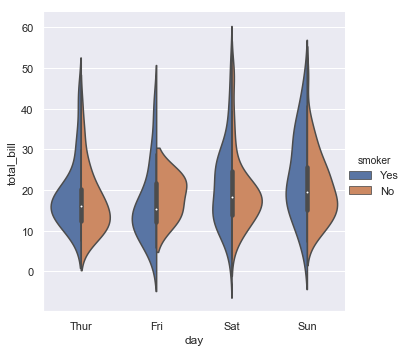

In [14]:
# alternately - kernel density estimation to represent
# underlying distribution that the points are sampled from
sns.catplot(x='day', y='total_bill', hue='smoker',
           kind='violin', split=True, data=tips);

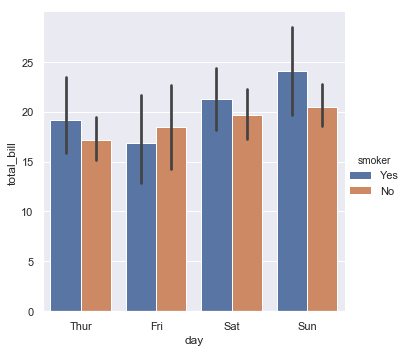

In [15]:
# also showing only mean value and its confidence interval
sns.catplot(x='day', y='total_bill', hue='smoker',
           kind='bar', data=tips);

<h4>Figure-level and axes-level functions</h4>

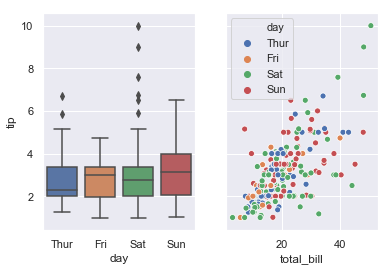

In [22]:
# figure-level functions: relplot() and catplot()-return the FacetGrid
# axes-level functions: scatterplot(), barplot(), boxplot(), etc
# are inside more complex matplotlib figure - return axes
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6,4))
sns.boxplot(x='day', y='tip', data=tips, ax=axes[0])
sns.scatterplot(x='total_bill', y='tip', hue='day',
               data=tips, ax=axes[1]);

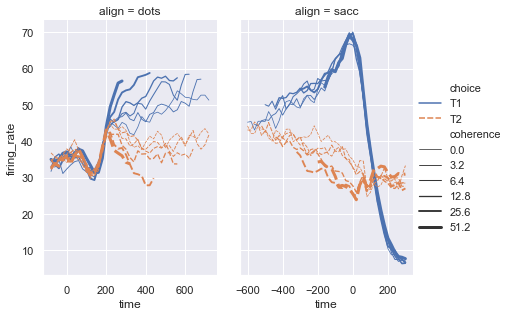

In [23]:
# controlling the size of the figure-level function works
# by using params for height and aspect ratio
sns.relplot(x='time', y='firing_rate', col='align',
           hue='choice', size='coherence', style='choice',
           height=4.5, aspect=2/3, facet_kws=dict(sharex=False),
           kind='line', legend='full', data=dots);

<h4>Visualizing dataset structure</h4>

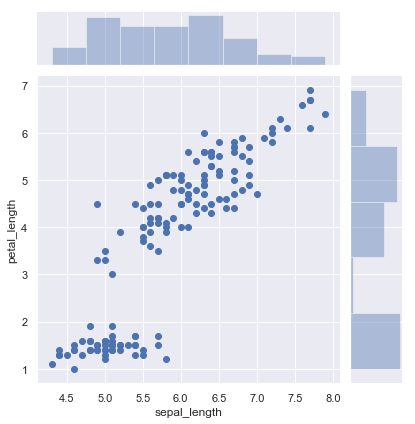

In [24]:
# jointplot() and pairplot() - also figure-level functions
# they are oriented towards showing the structue of a dataset
iris = sns.load_dataset('iris')
sns.jointplot(x='sepal_length', y='petal_length', data=iris);

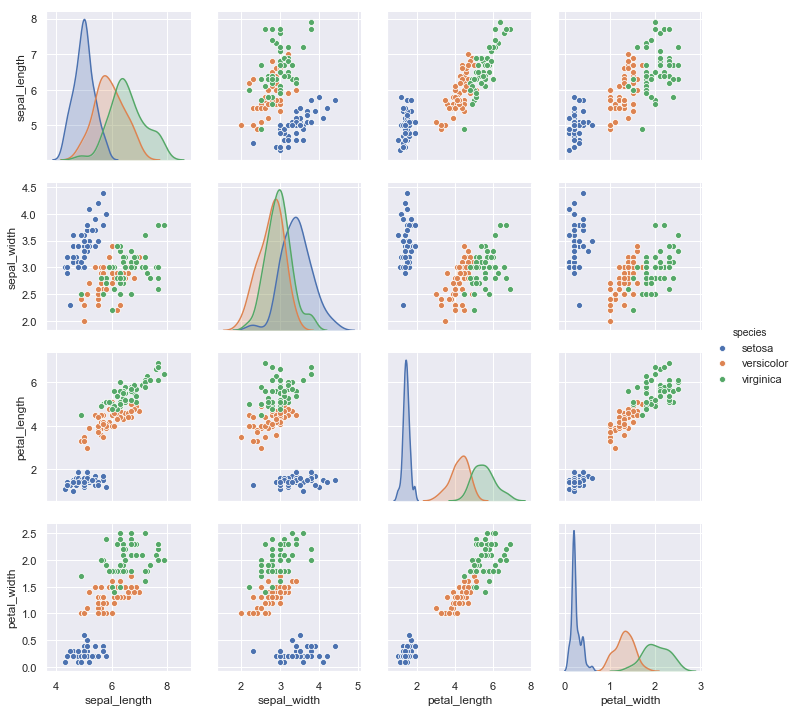

In [25]:
# pairplot() shows all pairwise relationships and marginal
# distributions, optionally conditioned on categorical var
sns.pairplot(data=iris, hue='species');

<h4>Customizing plot appearance</h4>

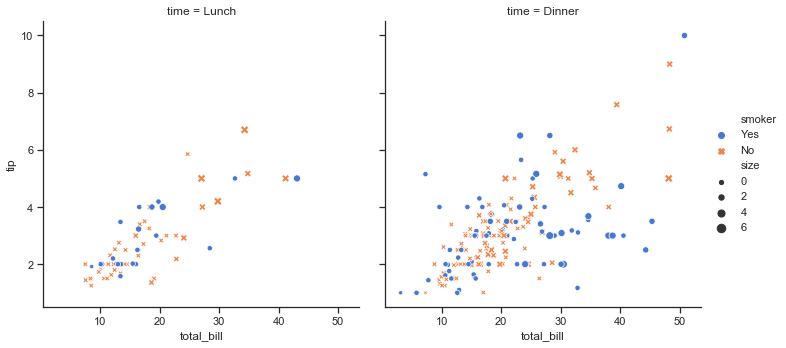

In [27]:
# default plots show only aesthetic view and info labels
# fully polished custom plot require additional steps
# first: setting alternate seaborn theme and color palette
sns.set(style='ticks', palette='muted')

sns.relplot(x='total_bill', y='tip', col='time',
           hue='smoker', style='smoker', size='size', data=tips);

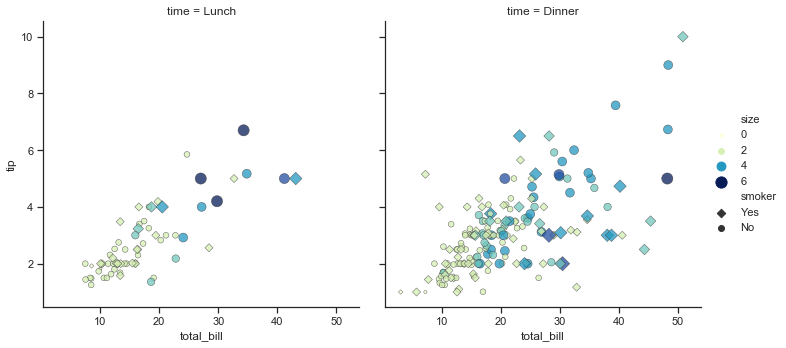

In [34]:
# additional keyword arguments passed to matplotlib layer
sns.relplot(x='total_bill', y='tip', col='time',
           hue='size', style='smoker', size='size',
           palette='YlGnBu', markers=['D', 'o'],
           sizes=(10, 125), edgecolor='.2', linewidth=.5,
           alpha=.75, data=tips);

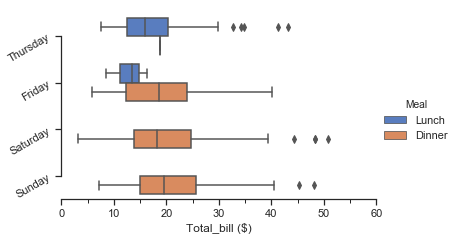

In [46]:
# additional parameters added to FacetGrid object
g = sns.catplot(x='total_bill', y='day', hue='time',
               height=3.5, aspect=1.5, kind='box',
               legend=False, data=tips)
g.add_legend(title='Meal')
g.set_axis_labels('Total_bill ($)', '')
g.set(xlim=(0,60), yticklabels=['Thursday', 'Friday', 'Saturday', 'Sunday'])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5,15,25,35,45,55], minor=True)
plt.setp(g.ax.get_yticklabels(), rotation=30);